# Implementing KNN on Breast Cancer detection

IMPORT ALL THE LIBRARIES REQUIRED


In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

Inspecting data

In [3]:
iris_data=load_breast_cancer()


In [4]:
df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)


In [5]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [6]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension'],
      dtype='object')

In [7]:
df.isnull().sum()

mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

In [8]:
X=iris_data.data
Y=iris_data.target

In [9]:
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


Splitting the data

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


Finding teh best k value using cross validation

In [11]:
possible_k_values=range(1,26)
cv_scores=[]

for k in possible_k_values:
    knn=KNeighborsClassifier(n_neighbors=k)
    s=cross_val_score(knn,X_train, y_train, cv=5, scoring='accuracy')
    cv_scores.append(s.mean())

best_k_value=possible_k_values[np.argmax(cv_scores)]
print(f"Best k value is {best_k_value}")

Best k value is 8


Train with best k

In [12]:
knn_best = KNeighborsClassifier(n_neighbors=best_k_value)
knn_best.fit(X_train, y_train)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


Prediction time!

In [13]:
y_pred = knn_best.predict(X_test)


In [14]:
y_pred

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1])

Classification Matrix for evaluating the performance

In [15]:
from sklearn.metrics import classification_report, confusion_matrix


In [16]:
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=iris_data.target_names))

print(f"Test Accuracy: {knn_best.score(X_test, y_test):.4f}")


Confusion Matrix:
[[ 59   4]
 [  2 106]]

Classification Report:
              precision    recall  f1-score   support

   malignant       0.97      0.94      0.95        63
      benign       0.96      0.98      0.97       108

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Test Accuracy: 0.9649


Visualization

In [17]:
X_small=iris_data.data[:,:2]
Y_small=iris_data.target

In [18]:
X_train_small, X_test_small, y_train_small, y_test_small = train_test_split(X_small, Y_small, test_size=0.3, random_state=42)

In [19]:
knn = KNeighborsClassifier(n_neighbors=8)
knn.fit(X_train_small, y_train_small)

,n_neighbors,8
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [20]:
print(f"Test Accuracy: {knn.score(X_test_small, y_test_small):.2f}")


Test Accuracy: 0.90


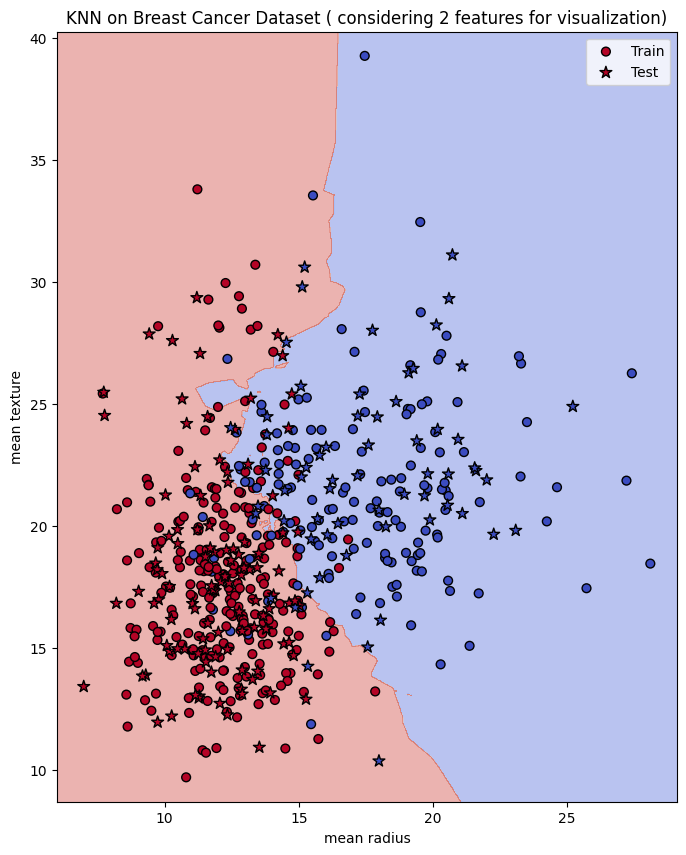

In [21]:
step = .02  # step size in mesh
x_min, x_max = X_small[:, 0].min() - 1, X_small[:, 0].max() + 1
y_min, y_max = X_small[:, 1].min() - 1, X_small[:, 1].max() + 1
x_mesh, y_mesh = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

Z = knn.predict(np.c_[x_mesh.ravel(), y_mesh.ravel()])
Z = Z.reshape(x_mesh.shape)

plt.figure(figsize=(8, 10))
plt.contourf(x_mesh, y_mesh, Z, cmap=plt.cm.coolwarm, alpha=0.4)
plt.scatter(X_train_small[:, 0], X_train_small[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolor='k', s=40, label='Train')
plt.scatter(X_test_small[:, 0], X_test_small[:, 1], c=y_test, cmap=plt.cm.coolwarm, edgecolor='k', marker='*', s=80, label='Test')
plt.xlabel(iris_data.feature_names[0])
plt.ylabel(iris_data.feature_names[1])
plt.title("KNN on Breast Cancer Dataset ( considering 2 features for visualization)")
plt.legend()
plt.show()